# Unidad 5: Introducción a Archivos NetCDF y su Manipulación en Python

Hasta este punto hemos repasado conceptos de lógica, cómo operar con los distintos tipos de datos en Python y además cómo trabajar sobre el paradigma orientado a objetos.




Como lo comentamos en la introducción el propósito de este curso es aprender a utilizar python con un enfoque hacia el tratamiento de datos. Esto no es mas que aplicar funciones sobre cierto conjuntos de datos a fin de poner obtener cierta información relevante.

En esta unidad vamos a abordar una de las temáticas, a nuestro criterio, que más destacamos de este curso.

El netCDF (formulario de datos comunes en red) es un formato de archivo destinado a almacenar datos científicos multidimensionales (variables) como la temperatura, la humedad, la presión, la velocidad del viento y la dirección. Cada una de estas variables se puede mostrar mediante una dimensión (por ejemplo, tiempo). Muchas organizaciones y grupos científicos de diferentes países han adoptado netCDF como estándar para representar algunos tipos de datos científicos.

### ¿Qué es NetCDF?

    Formato para almacenar datos multidimensionales (ej. tiempo, latitud, longitud, profundidad).

    Muy común en ciencias atmosféricas, oceanografía, climatología, etc.

    Extensión común: .nc

    Permite incluir metadatos junto con los datos.

Antes de empezar a ver código, tenmos que tener en cuenta algunos términos esenciales para entender los datos de netCDF y multidimensionales.

### Dimensiones

La dimensión netCDF consta de nombre y tamaño. El tamaño de la dimensión es un número entero positivo de valor arbitrario. Sólo una de las dimensiones que aparece en un archivo netCDF puede tener el tamaño SIN LÍMITE. Dicha dimensión es la dimensión sin límite o la dimensión de registro. Una variable con una dimensión sin límite puede incrementarse hasta alcanzar cualquier longitud en dicha dimensión.

La dimensión se puede utilizar para representar una dimensión física real; por ejemplo, tiempo, latitud, longitud o altura. La dimensión también se puede utilizar como índice de otras cantidades, por ejemplo, número para ejecutar estación o modelo. Es posible utilizar la misma dimensión más de una vez para especificar una forma variable.

### Variables

Una variable representa un conjunto de valores del mismo tipo. Las variables se utilizan para almacenar el volumen de los datos en un archivo netCDF. Una variable posee un nombre, un tipo de datos y una forma que está descripta según su lista de dimensiones especificada cuando la variable ha sido creada. 
El número de dimensiones se denomina clasificación (o dimensionalidad). 
Una variable escalar tiene una clasificación de 0, 
un vector tiene una clasificación de 1 y 
una matriz tiene una clasificación de 2. 
Una variable también puede tener atributos asociados que se pueden agregar, eliminar o cambiar después de crear la variable.

### Variables de coordenadas

Una variable unidimensional que tenga el mismo nombre que una dimensión se denomina variable de coordenadas. Se asocia a una dimensión constituida por una o más variables de datos y, normalmente, define la coordenada física que corresponde a esa dimensión.

Las variables de coordenadas no tienen ningún significado especial para la mayoría de las bibliotecas que soportan la manipulación de netCDF. Sin embargo, se deben tratar las variables de coordenadas de una forma especial.

### Atributos

Los atributos netCDF se utilizan para almacenar datos secundarios o metadatos. La mayoría de los atributos proporcionan información sobre una variable determinada. Estos atributos se identifican por el nombre de la variable junto con el nombre del atributo.

Para nuestro primer ejemplo vamos a tener que instalar algunas librerías

pip install netCDF4 xarray matplotlib cartopy

In [10]:
from netCDF4 import Dataset

# Cargar archivo
nc = Dataset('datos/era5_2000_aug.nc', mode='r')

# Ver variables disponibles
print(nc.variables.keys())


dict_keys(['longitude', 'latitude', 'time', 'u10', 'v10', 't2m'])


Esto muestra que el archivo NetCDF contiene las siguientes variables:

- 'longitude', 'latitude': coordenadas espaciales.

- 'time': dimensión temporal.

- 'u10', 'v10': componentes del viento a 10 metros (u: este-oeste, v: norte-sur).

- 't2m': temperatura a 2 metros de altura.

Estas variables pueden ser coordenadas (como lat/lon/time) o datos físicos.

In [11]:

# Ver estructura de una variable
print(nc.variables['t2m'])


<class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, latitude, longitude)
    scale_factor: 0.0016041834362077122
    add_offset: 261.82301992976625
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape = (1, 721, 1440)
filling on


int16 t2m(time, latitude, longitude)

- int16: los datos están almacenados como enteros de 16 bits (para ahorrar espacio).
- Las dimensiones son: time, latitude, longitude, en ese orden.
- t2m tiene un tamaño de (1, 721, 1440):
    - 1 tiempo (ej. un solo día/hora)
    - 721 latitudes
    - 1440 longitudes

scale_factor: 0.001604...
add_offset: 261.823...

Esto indica que los datos están comprimidos por escala y desplazamiento, una técnica común en NetCDF para ahorrar espacio:

Para obtener los valores reales de temperatura (t2m), hay que hacer:
- temperatura_real = datos_crudos * scale_factor + add_offset

Otros atributos:
_FillValue: -32767
missing_value: -32767

- Estos indican el valor que se usa para representar datos faltantes.
- Cuando veas -32767 en el array, significa que ese dato no está disponible.

units: K
long_name: 2 metre temperature

- La variable está en kelvin (K).
- Se refiere a la temperatura a 2 metros del suelo, típicamente usada en meteorología.

unlimited dimensions: 
- Ninguna dimensión está marcada como "ilimitada", lo cual es opcional en NetCDF (ej. para series temporales crecientes).

Estamos accediendo a una variable llamada t2m, que representa la temperatura a 2 metros del suelo, en grados Kelvin, para una grilla global con 721 latitudes y 1440 longitudes, en un único paso temporal. Los valores están comprimidos usando un factor de escala y un desplazamiento, y los datos faltantes están marcados con -32767.

In [12]:

# Extraer datos
temp = nc.variables['t2m'][:]
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]


In [13]:

# Cerrar archivo
nc.close()


⚠️ 1. Riesgo de pérdida de memoria

    El archivo queda abierto en memoria, lo cual consume recursos del sistema.

    Si abrís muchos archivos sin cerrarlos, podrías llenar la memoria RAM o alcanzar el límite de archivos abiertos del sistema operativo (especialmente en Linux o macOS).

⚠️ 2. Posibles errores de escritura o corrupción (si abrís en modo 'w' o 'a')

    Si estuvieras escribiendo (mode='w' o 'a'), no cerrar el archivo podría evitar que se guarden correctamente los cambios.

    En modo de solo lectura ('r'), esto es menos crítico, pero sigue siendo una mala práctica dejar archivos abiertos.

⚠️ 3. Bloqueo del archivo

    En algunos sistemas, otro proceso o script no podrá acceder al archivo si aún está abierto por tu script de Python.

In [14]:
print(temp)

[[[272.40100551 272.40100551 272.40100551 ... 272.40100551 272.40100551
   272.40100551]
  [272.35769256 272.35769256 272.35769256 ... 272.35769256 272.35769256
   272.35769256]
  [272.33683817 272.33683817 272.33683817 ... 272.33683817 272.33683817
   272.33683817]
  ...
  [217.71599635 217.71920472 217.72562145 ... 217.70797543 217.7111838
   217.71278798]
  [217.78497624 217.78978879 217.79299716 ... 217.78176787 217.78337206
   217.78337206]
  [217.58605749 217.58605749 217.58605749 ... 217.58605749 217.58605749
   217.58605749]]]


In [15]:
print(lat)

[ 90.    89.75  89.5   89.25  89.    88.75  88.5   88.25  88.    87.75
  87.5   87.25  87.    86.75  86.5   86.25  86.    85.75  85.5   85.25
  85.    84.75  84.5   84.25  84.    83.75  83.5   83.25  83.    82.75
  82.5   82.25  82.    81.75  81.5   81.25  81.    80.75  80.5   80.25
  80.    79.75  79.5   79.25  79.    78.75  78.5   78.25  78.    77.75
  77.5   77.25  77.    76.75  76.5   76.25  76.    75.75  75.5   75.25
  75.    74.75  74.5   74.25  74.    73.75  73.5   73.25  73.    72.75
  72.5   72.25  72.    71.75  71.5   71.25  71.    70.75  70.5   70.25
  70.    69.75  69.5   69.25  69.    68.75  68.5   68.25  68.    67.75
  67.5   67.25  67.    66.75  66.5   66.25  66.    65.75  65.5   65.25
  65.    64.75  64.5   64.25  64.    63.75  63.5   63.25  63.    62.75
  62.5   62.25  62.    61.75  61.5   61.25  61.    60.75  60.5   60.25
  60.    59.75  59.5   59.25  59.    58.75  58.5   58.25  58.    57.75
  57.5   57.25  57.    56.75  56.5   56.25  56.    55.75  55.5   55.25
  55. 

In [19]:
import xarray as xr

# Abrir archivo NetCDF
ds = xr.open_dataset('datos/era5_2000_aug.nc')

# Ver contenido
print(ds)

# Seleccionar variables
temp = ds['t2m']

# Filtrar por tiempo, latitud, longitud
temp.sel(time='2019-06-04', latitude=30, longitude=120, method='nearest')

<xarray.Dataset> Size: 25MB
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 8B 2000-08-01
Data variables:
    u10        (time, latitude, longitude) float64 8MB ...
    v10        (time, latitude, longitude) float64 8MB ...
    t2m        (time, latitude, longitude) float64 8MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-06-04 13:45:49 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...


<xarray.DataArray 't2m' ()> Size: 8B
[1 values with dtype=float64]
Coordinates:
    longitude  float32 4B 120.0
    latitude   float32 4B 30.0
    time       datetime64[ns] 8B 2000-08-01
Attributes:
    units:      K
    long_name:  2 metre temperature

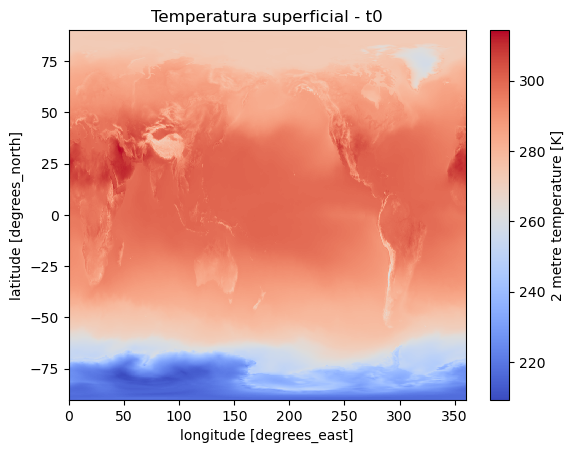

In [20]:
import matplotlib.pyplot as plt

# Plot de un campo de temperatura
temp.isel(time=0).plot(cmap='coolwarm')
plt.title('Temperatura superficial - t0')
plt.show()


/home/dario/miniconda3/envs/geers/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


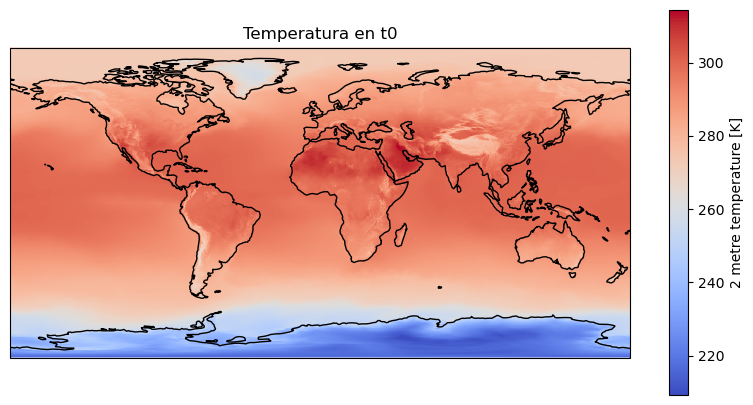

In [21]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
temp.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
plt.title('Temperatura en t0')
plt.show()
